# Visualisierung & Statistische Analyse der IMDb-Daten

In diesem Notebook werden die bereinigten Filmdaten aus der IMDb-Datenbank analysiert.  
Wir erstellen zunächst einfache Visualisierungen zur Bewertung und Beliebtheit der Filme.  
Anschließend führen wir eine statistische Analyse durch, um Zusammenhänge (z. B. zwischen Bewertung und Anzahl Stimmen) zu untersuchen.

## Datenzugriff

Die Daten stammen aus der SQLite-Datenbank `imdb.sqlite`, die aus den IMDb-TSV-Dateien erzeugt wurde.  
Wir verwenden eine SQL-Abfrage, um nur die relevanten Spalten (`title`, `startYear`, `averageRating`, `numVotes`, `genres`) zu laden.

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/raw/imdb.sqlite")
df = pd.read_sql_query("""
    SELECT primaryTitle, startYear, averageRating, numVotes, genres
    FROM basics
    JOIN ratings USING(tconst)
    WHERE startYear IS NOT NULL AND averageRating IS NOT NULL
""", conn)
conn.close()

## Visualisierungen

Im Folgenden erstellen wir:

- ein **Histogramm** der `averageRating`, um die Verteilung der Bewertungen zu untersuchen  
- ein **Scatterplot** zwischen `averageRating` und `numVotes`, um eventuelle Zusammenhänge zu erkennen  
- ein **Balkendiagramm** der häufigsten Genres

Die Diagramme helfen, die Struktur der Daten besser zu verstehen.

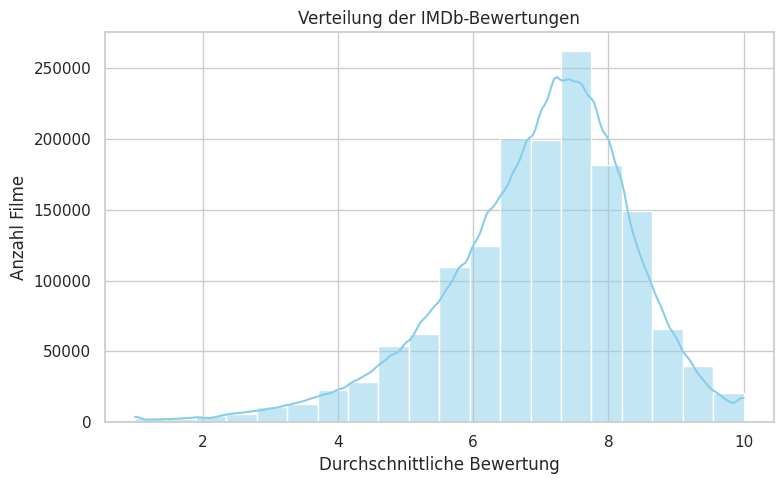

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stil setzen (optional, schöneres Design)
sns.set(style="whitegrid")

# Histogramm: averageRating
plt.figure(figsize=(8, 5))
sns.histplot(df["averageRating"], bins=20, kde=True, color="skyblue")
plt.title("Verteilung der IMDb-Bewertungen")
plt.xlabel("Durchschnittliche Bewertung")
plt.ylabel("Anzahl Filme")
plt.tight_layout()
plt.show()

### Interpretation: Verteilung der IMDb-Bewertungen

Das Histogramm zeigt die Verteilung der durchschnittlichen IMDb-Bewertungen aller Filme im Datensatz.

**Beobachtungen:**

- Die Bewertungen folgen annähernd einer **rechtsschiefen Normalverteilung** (also eine leichte Linksverschiebung).
- Der **häufigste Bewertungsbereich liegt zwischen 6.0 und 8.0 Punkten** – viele Filme erreichen durchschnittlich gute Bewertungen.
- Extrem niedrige Bewertungen (unter 3) und extrem hohe (über 9) sind sehr selten.
- Die **Spitze liegt bei ca. 7.0–7.5**, was auf eine zentrale Tendenz in diesem Bereich hindeutet.
- Die glatte Linie (KDE-Kurve) verdeutlicht die Dichteverteilung: Es gibt nur wenige Filme mit sehr schlechter oder sehr hervorragender Bewertung.

**Interpretation:**  
Die IMDb-Community vergibt tendenziell mittlere bis gute Bewertungen. Filme, die sehr schlecht oder extrem gut bewertet sind, stellen eher die Ausnahme dar. Das könnte u. a. an der großen Menge durchschnittlicher Produktionen liegen oder daran, dass Nutzer extremer Bewertungen seltener sind.

 **Scatterplot** zwischen `averageRating` und `numVotes`, um eventuelle Zusammenhänge zu erkennen 

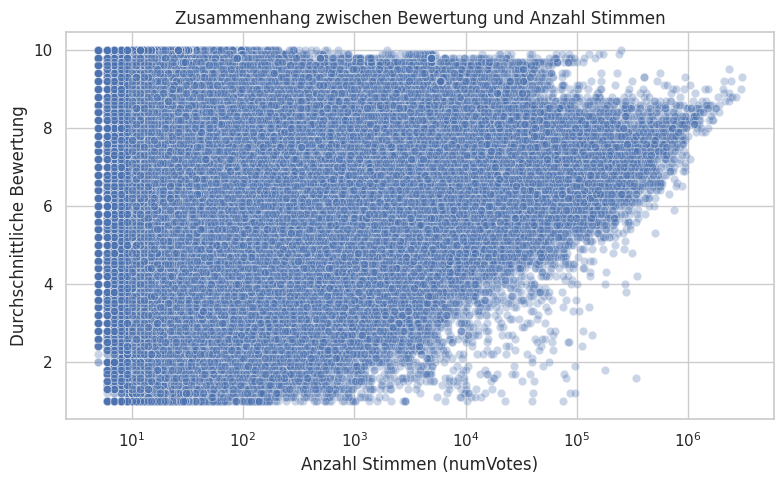

In [4]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="numVotes", y="averageRating", alpha=0.3)
plt.title("Zusammenhang zwischen Bewertung und Anzahl Stimmen")
plt.xlabel("Anzahl Stimmen (numVotes)")
plt.ylabel("Durchschnittliche Bewertung")
plt.xscale("log")  # Log-Skala wegen starker Unterschiede
plt.tight_layout()
plt.show()

### Interpretation: Bewertung vs. Anzahl Stimmen

Der Scatterplot zeigt den Zusammenhang zwischen der Anzahl der abgegebenen Stimmen (`numVotes`) und der durchschnittlichen IMDb-Bewertung (`averageRating`) pro Film.

**Beobachtungen:**

- Die Mehrheit der Filme hat **sehr wenige Stimmen** (unter 100) – das erklärt die dichte Konzentration am linken Rand.
- Filme mit **mehr Stimmen** (10.000–1.000.000+) tendieren zu Bewertungen zwischen **6 und 8 Punkten**.
- Nur wenige Filme mit sehr vielen Stimmen fallen unter eine Bewertung von 5 – extrem schlecht bewertete Filme sind selten massenrelevant.
- Es gibt keine klare lineare Beziehung – die Punktwolke wirkt eher zufällig, verdichtet sich aber in einem Bereich.

**Interpretation:**

Obwohl keine starke lineare Korrelation erkennbar ist, scheint es einen **leichten positiven Zusammenhang** zu geben:  
Filme mit sehr vielen Bewertungen erreichen tendenziell höhere Durchschnittsbewertungen.  
Das kann darauf hinweisen, dass populärere Filme (mehr Zuschauer, mehr Bewertungen) auch **qualitativ besser bewertet** werden – oder, dass schlechte Filme **gar nicht erst genug Zuschauer** für viele Bewertungen erreichen.

Eine genauere Aussage erfordert die zusätzliche Berechnung des **Korrelationskoeffizienten** (z. B. Pearson) und des p-Werts.

## Balkendiagramm


/tmp/ipykernel_40965/1295663515.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


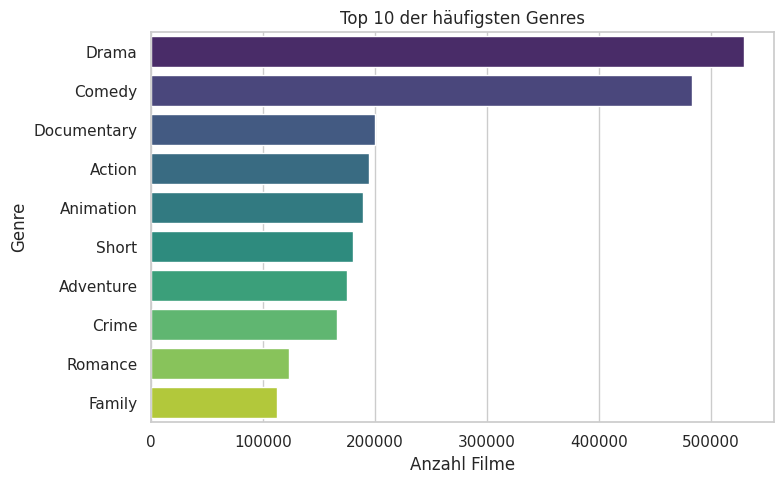

In [5]:
genre_counts = df["genres"].dropna().str.split(",").explode().value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 10 der häufigsten Genres")
plt.xlabel("Anzahl Filme")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

### Interpretation: Häufigste Filmgenres (Top 10)

Diese Balkengrafik zeigt die zehn am häufigsten vertretenen Filmgenres im IMDb-Datensatz (einzelne Genres wurden aus Mehrfachnennungen aufgespalten).

**Beobachtungen:**

- **Drama** ist mit Abstand das häufigste Genre, gefolgt von **Comedy** – zusammen machen sie einen großen Teil aller Filme aus.
- Auch **Documentary**, **Action** und **Animation** sind stark vertreten, was auf ein breites Produktionsspektrum hindeutet.
- Überraschend ist die hohe Anzahl an **Shorts** (Kurzfilmen) – diese sind besonders in der IMDb umfangreich dokumentiert.
- Die Genres **Romance** und **Family** erscheinen am seltensten unter den Top 10, sind aber dennoch mit über 100.000 Filmen gut vertreten.

**Interpretation:**

Die Verteilung deutet auf einen klaren inhaltlichen Fokus der IMDb-Datenbank hin:  
Filme mit dramatischen, komödiantischen oder dokumentarischen Inhalten sind besonders häufig vorhanden.  
Das könnte sowohl auf Produktionsrealitäten als auch auf Nutzerinteressen zurückzuführen sein.



## Boxplot: Bewertung pro Genre

/tmp/ipykernel_40965/906994224.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x="genres", y="averageRating", palette="Set2")


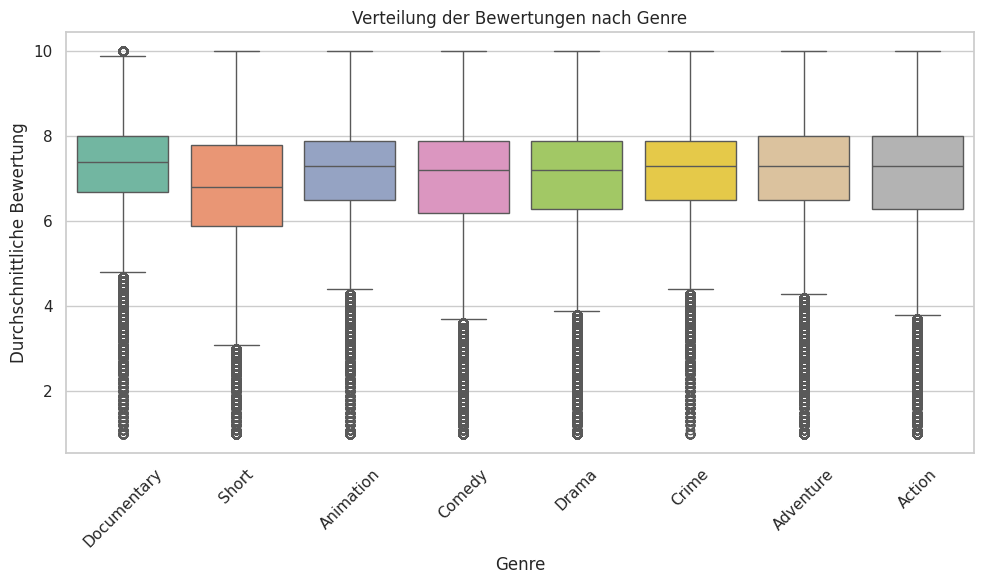

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Genre-Spalte aufteilen, falls sie noch kommasepariert ist
df_exploded = df.copy()
df_exploded = df_exploded.dropna(subset=["genres"])
df_exploded["genres"] = df_exploded["genres"].str.split(",")
df_exploded = df_exploded.explode("genres")

# Optional: Nur häufige Genres verwenden
top_genres = df_exploded["genres"].value_counts().head(8).index
df_top = df_exploded[df_exploded["genres"].isin(top_genres)]

# Boxplot zeichnen
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top, x="genres", y="averageRating", palette="Set2")
plt.title("Verteilung der Bewertungen nach Genre")
plt.xlabel("Genre")
plt.ylabel("Durchschnittliche Bewertung")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation: Bewertungsverteilung nach Genre (Boxplot)

Der Boxplot zeigt die Verteilung der durchschnittlichen IMDb-Bewertungen für verschiedene Filmgenres.  
Die Visualisierung basiert auf den 8 häufigsten Genres und stellt Median, Quartile sowie Ausreißer dar.

**Beobachtungen:**

- **Documentary**-Filme weisen den höchsten Medianwert auf, gefolgt von **Animation** und **Drama** – diese Genres scheinen insgesamt besser bewertet zu werden.
- **Action**- und **Comedy**-Filme zeigen im Vergleich dazu eine leicht geringere durchschnittliche Bewertung.
- Der Großteil der Bewertungen liegt bei allen Genres im Bereich **zwischen 6 und 8 Punkten**.
- Es gibt **viele Ausreißer nach unten**, also Filme mit extrem niedriger Bewertung (< 4) – insbesondere bei Comedy, Action und Short.
- Die Boxen (Interquartilsabstand) sind relativ breit, was auf eine **hohe Streuung innerhalb der Genres** hindeutet.

**Interpretation:**

Manche Genres schneiden im Durchschnitt besser ab als andere, wobei insbesondere Dokumentationen und Animationsfilme auffallen.  
Gleichzeitig zeigt sich eine hohe Varianz – vor allem bei Genres mit vielen Produktionen (z. B. Action oder Comedy), wo Qualität und Bewertung stark schwanken können.


## Liniendiagramm: Entwicklung der Bewertungen über die Jahre

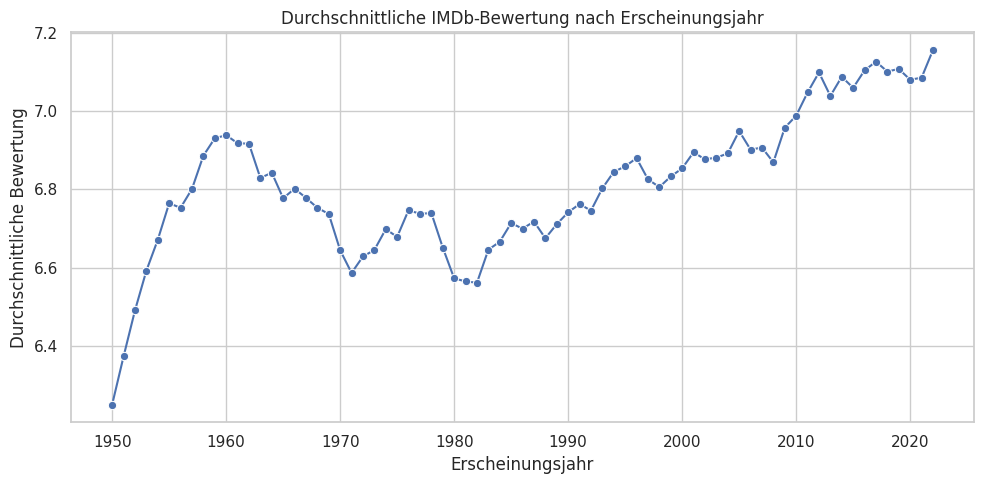

In [7]:
df_years = df.copy()
df_years = df_years[df_years["startYear"].between(1950, 2022)]

# Gruppieren und Mittelwerte berechnen
ratings_by_year = df_years.groupby("startYear")["averageRating"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=ratings_by_year, x="startYear", y="averageRating", marker="o")
plt.title("Durchschnittliche IMDb-Bewertung nach Erscheinungsjahr")
plt.xlabel("Erscheinungsjahr")
plt.ylabel("Durchschnittliche Bewertung")
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation: Durchschnittliche IMDb-Bewertung nach Erscheinungsjahr

Das Liniendiagramm zeigt, wie sich die durchschnittlichen IMDb-Bewertungen von Filmen im Zeitraum zwischen 1950 und 2023 verändert haben.

**Beobachtungen:**

- In den **1950er- und 1960er-Jahren** ist ein deutlicher Anstieg der Durchschnittsbewertungen zu sehen – von unter 6.5 auf fast 6.9.
- Ab ca. **1970 bis Ende der 1980er-Jahre** fällt der Wert leicht ab bzw. schwankt zwischen 6.6 und 6.8.
- Seit den **1990er-Jahren** steigt die durchschnittliche Bewertung wieder langsam aber stetig an.
- In den letzten Jahren (ab 2010) pendeln sich die Bewertungen über **7.0 ein**, mit einem **Höchstwert 2023** von über 7.1 Punkten.

**Interpretation:**

- Die Bewertungskurve könnte durch **Veränderungen im Bewertungsverhalten**, **Zugänglichkeit der Plattform** oder eine **bessere Datenlage in der jüngeren Vergangenheit** beeinflusst sein.
- Möglicherweise bewerten Nutzer neuere Filme generell wohlwollender, oder es werden überproportional besser bewertete Werke veröffentlicht.
- Auch **ältere Filme mit schlechter Bewertung** könnten seltener gelistet oder bewertet sein, was einen "historischen Bias" erklären könnte.

Weitere Analysen nach Jahrzehnt oder kombiniert mit Genres könnten zusätzliche Einsichten liefern.


In [8]:
%pip install --upgrade pip
%pip install --upgrade streamlit-jupyter


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Voraussetzung: pip install streamlit streamlit-jupyter matplotlib
import streamlit as st
from streamlit_jupyter import StreamlitPatcher
import matplotlib.pyplot as plt

# Streamlit in Jupyter aktivieren
StreamlitPatcher().jupyter()

st.set_page_config(page_title="Meine Visualisierungen", layout="wide")
st.title("Meine Visualisierungen 🎨")

fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 6, 5], marker="o")
ax.set_xlabel("x")
ax.set_ylabel("y")
st.pyplot(fig)


AttributeError: module 'streamlit' has no attribute 'experimental_data_editor'

In [ ]:
# Voraussetzung: pip install streamlit streamlit-jupyter matplotlib
import streamlit as st
from streamlit_jupyter import StreamlitPatcher
import matplotlib.pyplot as plt

# Streamlit in Jupyter aktivieren
StreamlitPatcher().jupyter()

st.set_page_config(page_title="Meine Visualisierungen", layout="wide")
st.title("Meine Visualisierungen 🎨")

fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 6, 5], marker="o")
ax.set_xlabel("x")
ax.set_ylabel("y")
st.pyplot(fig)
